In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import random as rn
from PIL import Image, ImageDraw
from matplotlib import cm
import cv2


In [2]:
flores = io.imread('Imagenes/flowers2.bmp')
floresRGB = np.clip(flores/255.0,0,1) #Normalizada

In [3]:
#Ploteo de imagenes

def plot(image,numIm,pos,title):
    plt.subplot(1,numIm,pos)
    plt.imshow(image)
    plt.title(title)
    plt.tight_layout()
def plot_pseu(image,numIm,pos,title):
    plt.subplot(1,numIm,pos)
    plt.imshow(image,cmap = 'plasma')
    plt.title(title)
    plt.tight_layout()

# 1.- Realiza el realce de la imagen flowers2 de la siguiente manera. Convierte la imagen de RGB a modelo HSI. Toma la banda I, ecualizala y regresa al modelo RGB.

In [4]:
#Ejercicio 1
def rgbToHSI(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    
    conversion = np.arccos(0.5 * ((r - g) + (r - b)) / (np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-10))
    h = conversion.copy()
    h[b > g] = 2 * np.pi - h[b > g]
    h =h/ 2 * np.pi
    s = 1 - 3 / (r + g + b + 1e-10) * np.minimum(np.minimum(r, g), b)
    i = (r + g + b) / 3

    img_hsi = np.stack([h, s, i], axis=-1)
    return img_hsi

def ecualizar_banda_i(banda_i):
    
    cdf_i = np.cumsum(np.histogram(banda_i.flatten(), bins=256, range=[0, 1])[0]) / banda_i.size
    i_ecualizada = np.interp(banda_i, np.linspace(0, 1, 256), cdf_i)

    return i_ecualizada


def hsiToRGB(img):
    h = img[:, :, 0] 
    s = img[:, :, 1]
    i = img[:, :, 2]
    h *= 2 * np.pi

    r = np.zeros_like(h)
    g = np.zeros_like(h)
    b = np.zeros_like(h)

    # Hacemos el sector RG
    mascara_rg = (0 <= h) & (h < 2 * np.pi / 3)
    b[mascara_rg] = i[mascara_rg] * (1 - s[mascara_rg])
    r[mascara_rg] = i[mascara_rg] * (1 + (s[mascara_rg] * np.cos(h[mascara_rg])) / (np.cos(np.pi / 3 - h[mascara_rg])))
    g[mascara_rg] = 3 * i[mascara_rg] - (r[mascara_rg] + b[mascara_rg])

    # Hacemos el sector GB
    mascara_gb = (2 * np.pi / 3 <= h) & (h < 4 * np.pi / 3)
    r[mascara_gb] = i[mascara_gb] * (1 - s[mascara_gb])
    g[mascara_gb] = i[mascara_gb] * (1 + (s[mascara_gb] * np.cos(h[mascara_gb] - 2 * np.pi / 3)) / (np.cos(np.pi / 3 - (h[mascara_gb] - 2 * np.pi / 3))))
    b[mascara_gb] = 3 * i[mascara_gb] - (r[mascara_gb] + g[mascara_gb])

    # Hacemos el sector BR
    mascara_br = (4 * np.pi / 3 <= h) & (h <= 2 * np.pi)
    g[mascara_br] = i[mascara_br] * (1 - s[mascara_br])
    b[mascara_br] = i[mascara_br] * (1 + (s[mascara_br] * np.cos(h[mascara_br] - 4 * np.pi / 3)) / (np.cos(np.pi / 3 - (h[mascara_br] - 4 * np.pi / 3))))
    r[mascara_br] = 3 * i[mascara_br] - (g[mascara_br] + b[mascara_br])

    img_restaurada = np.stack([r, g, b], axis=-1)
    return img_restaurada

In [5]:
floresHSI = rgbToHSI(floresRGB)
floresHSI[:, :, 2] = ecualizar_banda_i(floresHSI[:, :, 2])
floresRestaurada = hsiToRGB(floresHSI)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


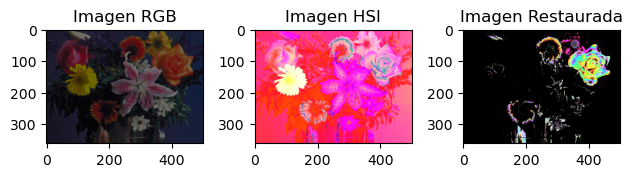

In [6]:
#Ploteamos Imagenes
plot(floresRGB,3,1,"Imagen RGB")
plot(floresHSI,3,2,"Imagen HSI")
plot(floresRestaurada,3,3,"Imagen Restaurada")

# 2.-Toma las imágenes propuestas que están en escala de grises. Representa cada una de ellas en pseudocolor utilizando el método de rebanado de intensidad. Haz que tu función pueda recibir como parametro la imagen y el número de niveles de color a representar.

In [20]:
plt.rcParams['image.cmap'] = 'gray'
cadera = cv2.imread("Imagenes/cadera_1.jpg",cv2.IMREAD_GRAYSCALE)
mano = cv2.imread("Imagenes/mano.jpeg",cv2.IMREAD_GRAYSCALE)
rodilla = cv2.imread("Imagenes/rodilla_1.jpg",cv2.IMREAD_GRAYSCALE)
medTest = cv2.imread("Imagenes/medtest.png",cv2.IMREAD_GRAYSCALE)

In [22]:
#Ejercicio 2
#Función que hace la chamba de cmap
def pseudocolor(img, niveles):

    min_intensity = np.min(img)
    max_intensity = np.max(img)

    intensity_levels = np.linspace(min_intensity, max_intensity, niveles + 1)

    rows, cols = img.shape
    result_image = np.zeros((rows, cols, 3), dtype=np.uint8)

    colors = cm.jet(np.linspace(0,1,niveles))

    for i in range(niveles):

        mask = (img >= intensity_levels[i]) & (img < intensity_levels[i+1])

        color_int = (colors[i,0] * 255).astype(np.uint8)
        result_image[:,:,0] += mask * color_int

        color_int = (colors[i,1] * 255).astype(np.uint8)
        result_image[:,:,1] += mask * color_int

        color_int = (colors[i,2] * 255).astype(np.uint8)
        result_image[:,:,2] += mask * color_int

    return result_image


In [30]:
#Valor random para los niveles
niveles = rn.randint(1,255)


caderaPS= pseudocolor(cadera,niveles)
manoPS = pseudocolor(mano,niveles)
rodillaPS = pseudocolor(rodilla,niveles)
medTestPS = pseudocolor(medTest,niveles)

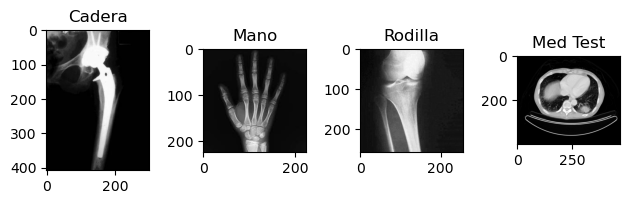

In [24]:
#Ploteamos en escala de grises
plot(cadera,4,1,"Cadera")
plot(mano,4,2,"Mano")
plot(rodilla,4,3,"Rodilla")
plot(medTest,4,4,"Med Test")

Con 109 niveles


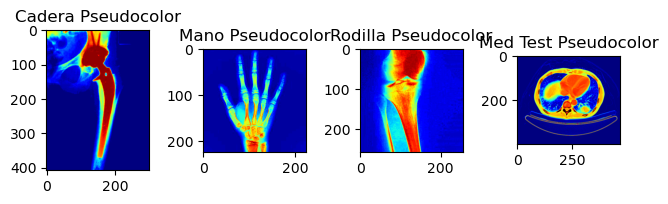

In [32]:
#Ploteamos con niveles dependiendo del valor de niveles
print("Con",niveles,"niveles")
plot(caderaPS,4,1,"Cadera Pseudocolor")
plot(manoPS,4,2,"Mano Pseudocolor")
plot(rodillaPS,4,3,"Rodilla Pseudocolor")
plot(medTestPS,4,4,"Med Test Pseudocolor")